In [1]:
from datetime import datetime

import polars as pl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
plt.rcParams['font.family'] = 'SimSun'

from config import CONFIG

In [2]:
path = f"{CONFIG.PROCESSED_DATA_PATH}/train/6/NWP_1.parquet"
df1_pl = (
    pl.read_parquet(path)
    .filter(
        (pl.col("forecast_time") < datetime(2024, 1, 3, 0, 0, 0))
    )
    .sort(["forecast_time", "lat", "lon"])
)
one_feature_nummy = (
    df1_pl
    .select("poai")
    .to_numpy()
    .squeeze()
    .reshape(24, 11, 11)
)
one_feature_nummy.shape

(24, 11, 11)

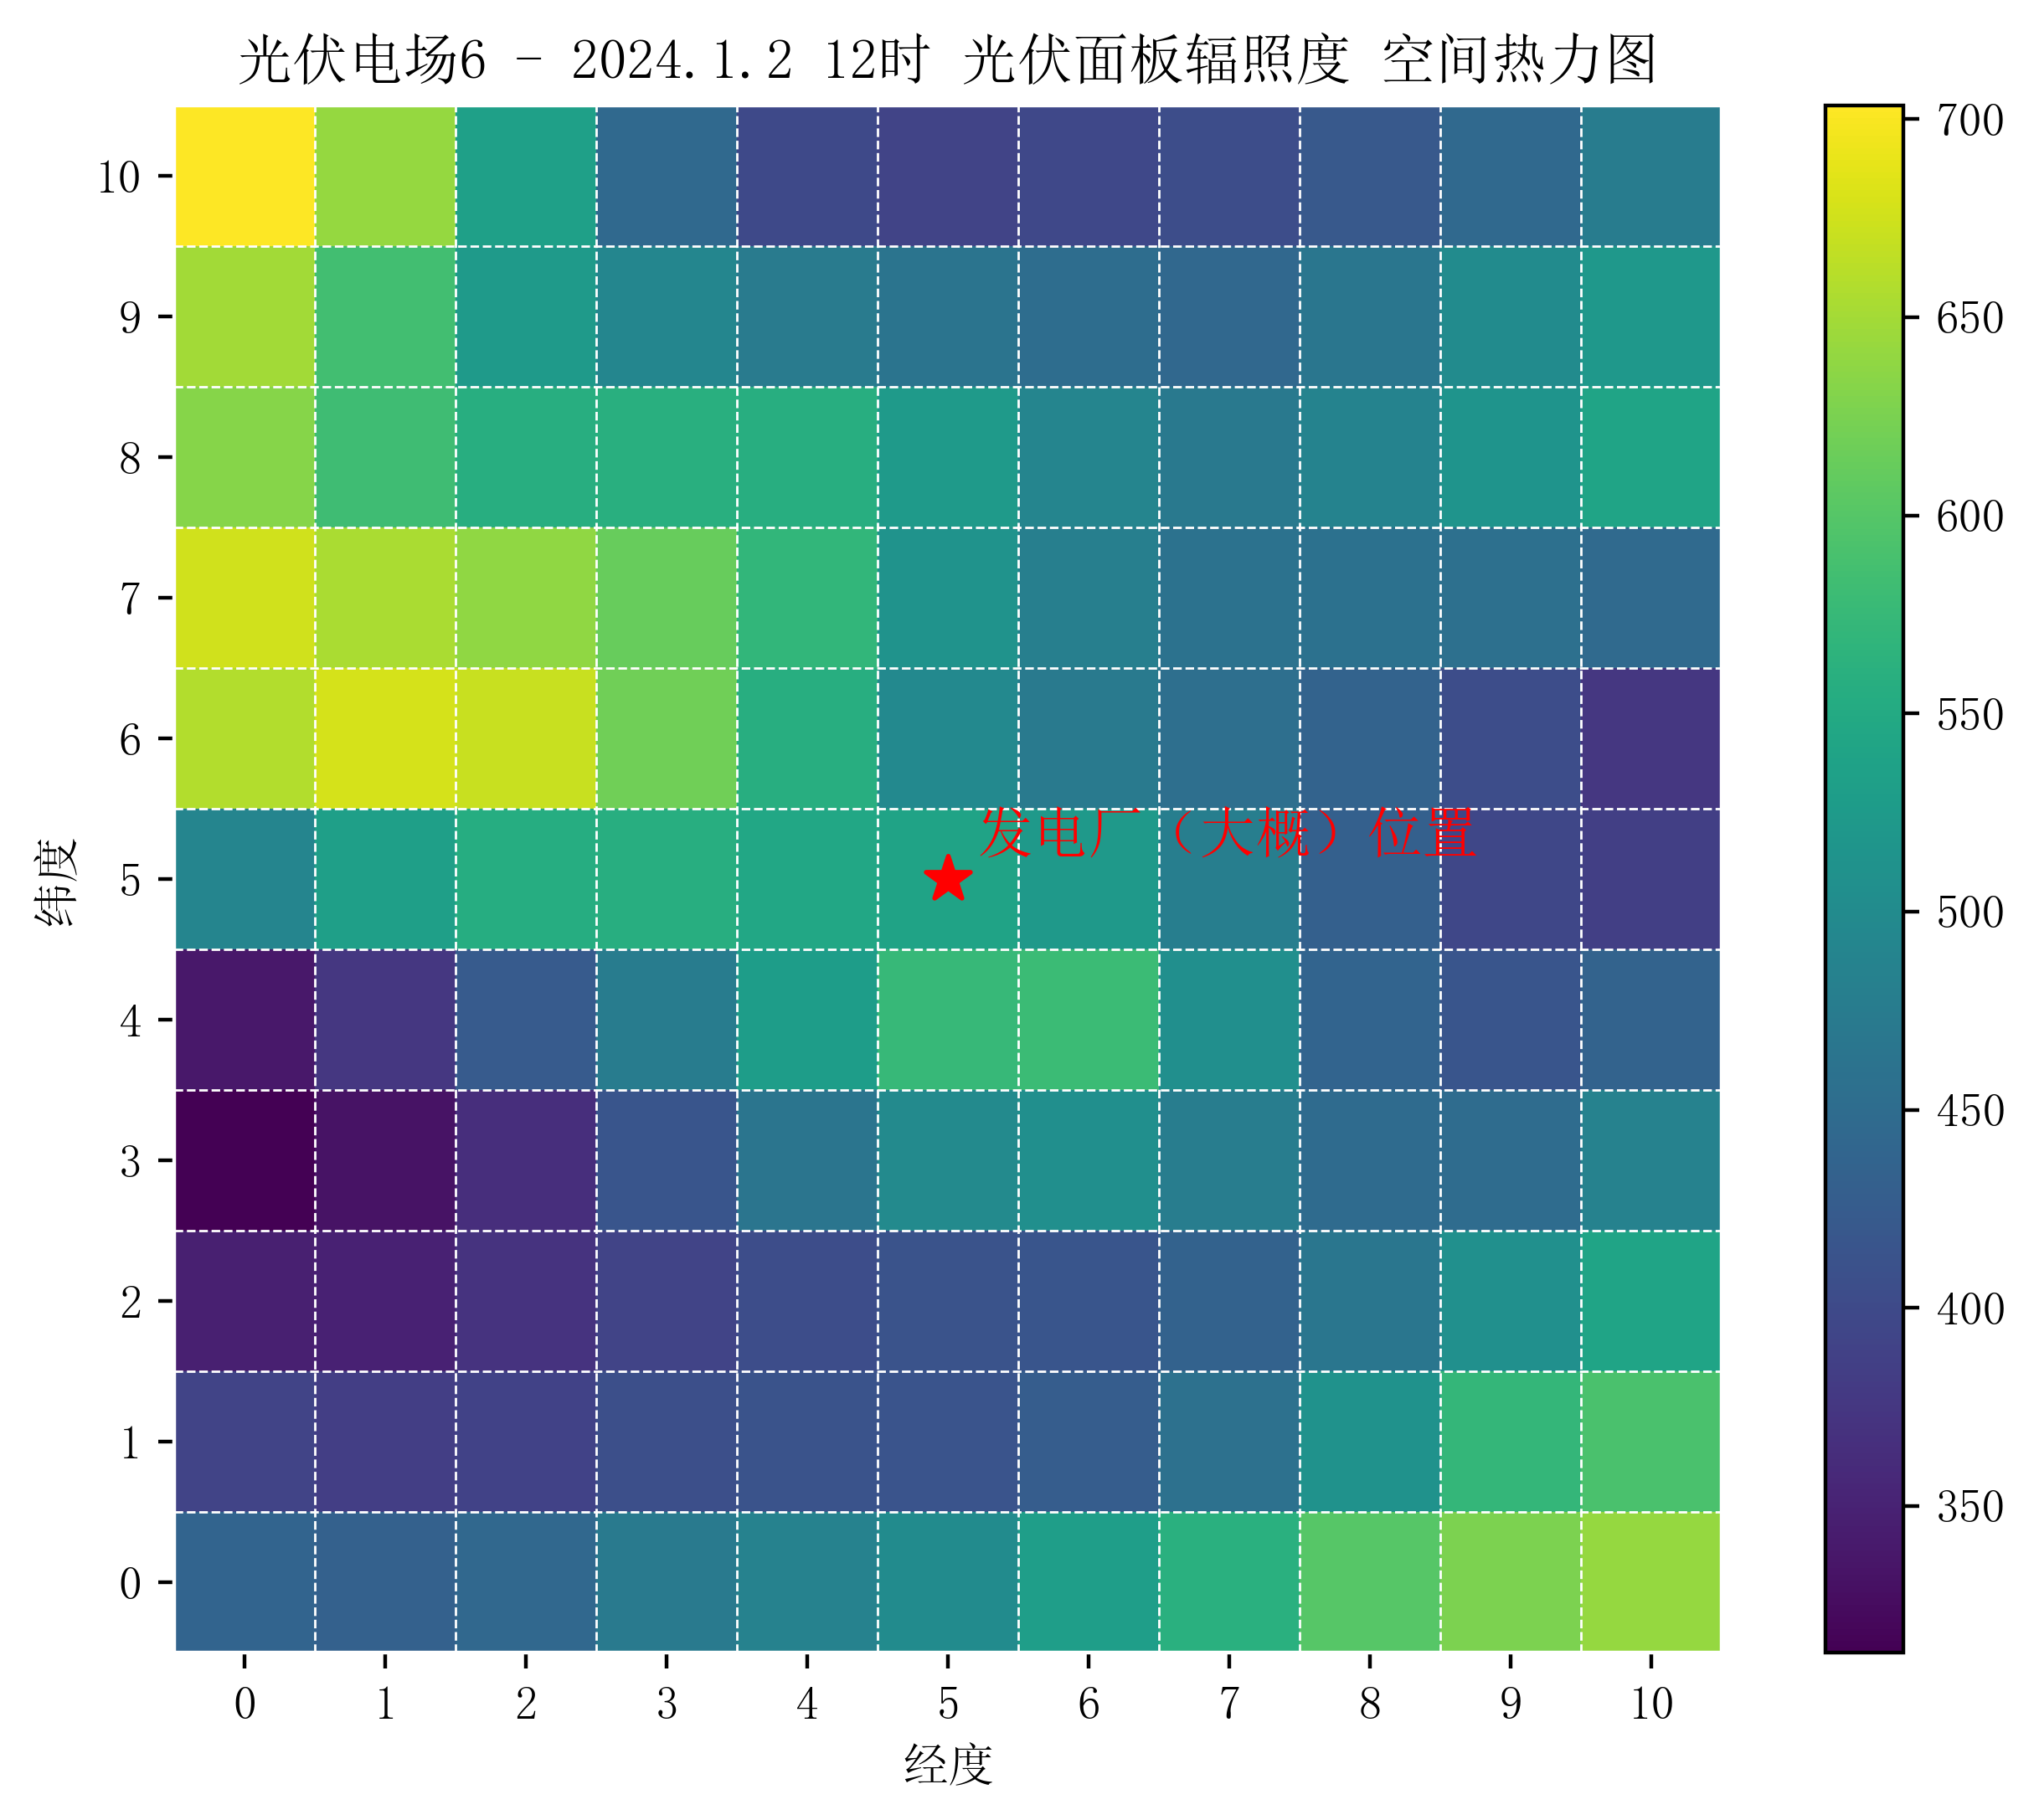

In [3]:
# 创建经纬网格
lon = np.linspace(-0.5, 10.5, 12)
lat = np.linspace(-0.5, 10.5, 12)
lon_grid, lat_grid = np.meshgrid(lon, lat)

plt.figure(figsize=(8,6), dpi=400)

plt.pcolormesh(lon_grid, lat_grid, one_feature_nummy[11], shading='auto', cmap='viridis') 
plt.colorbar() 

# 标出中心点（5,5）
center_lon = 5
center_lat = 5
plt.scatter(center_lon, center_lat, color='red', s=100, marker='*')
plt.text(center_lon+0.2, center_lat+0.2, '发电厂（大概）位置', color='red', fontsize=12)

plt.xlabel('经度')
plt.ylabel('纬度')

plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))

for y in lat:
    plt.hlines(y, xmin=lon.min(), xmax=lon.max(), colors='white', linestyles='--', linewidth=0.5)
for x in lon:
    plt.vlines(x, ymin=lat.min(), ymax=lat.max(), colors='white', linestyles='--', linewidth=0.5)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('white')
    
plt.title('光伏电场6 - 2024.1.2 12时 光伏面板辐照度 空间热力图')

plt.gca().set_aspect('equal')
plt.show()


C:\Users\67177\AppData\Local\Temp\ipykernel_16272\274511446.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


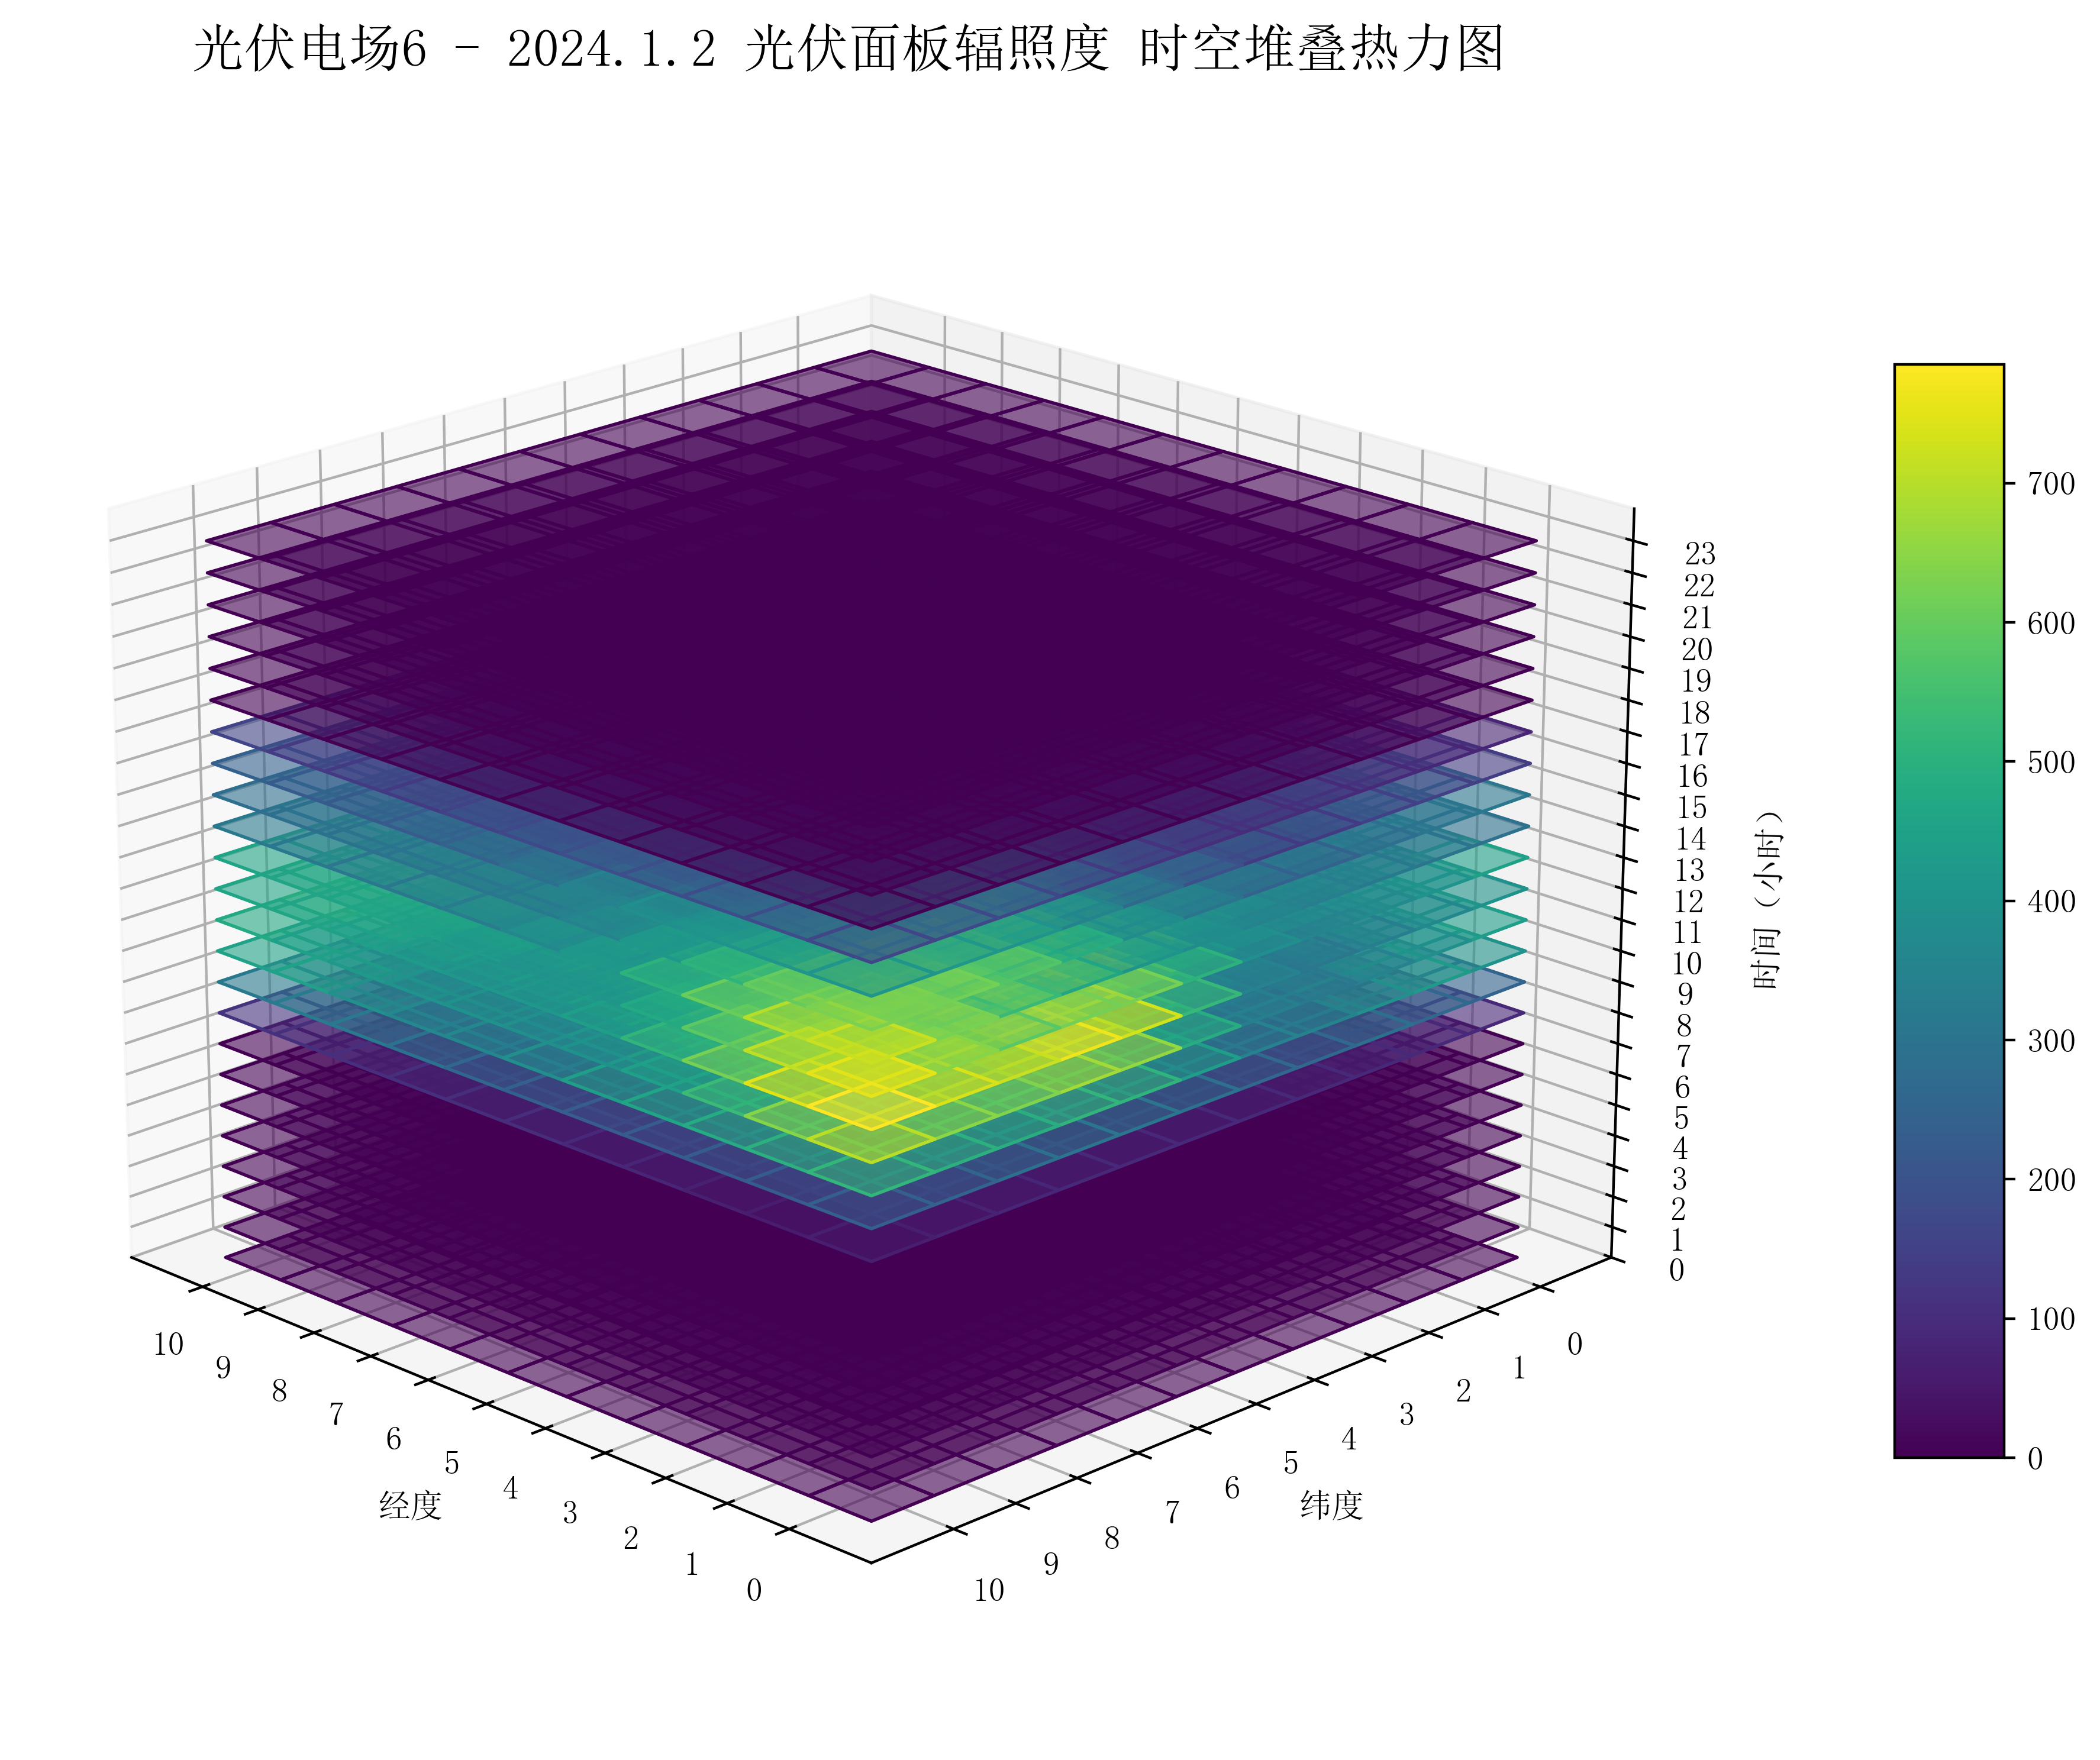

In [4]:
T = 24  
lon = np.linspace(-0.5, 10.5, 12)
lat = np.linspace(-0.5, 10.5, 12)
lon_grid, lat_grid = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12,10), dpi=400)
ax = fig.add_subplot(111, projection='3d')

# 遍历时间，每一帧堆一层
for t in range(T):
    z = np.full_like(lon_grid, t)
    ax.plot_surface(
        lon_grid, lat_grid, z, 
        facecolors=plt.cm.viridis(one_feature_nummy[t]/one_feature_nummy.max()), 
        rstride=1, cstride=1, shade=False, alpha=0.6
    )

ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('时间（小时）')

plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))

# 设置z轴
ax.set_zlim(0, T)
ax.set_zticks(np.arange(0, T, 1))

# 调整视角
ax.view_init(elev=20, azim=135)

# 添加颜色条
norm = plt.Normalize(vmin=one_feature_nummy.min(), vmax=one_feature_nummy.max())
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax, shrink=0.6, aspect=10, pad=0.1)

plt.title('光伏电场6 - 2024.1.2 光伏面板辐照度 时空堆叠热力图', fontsize=16)

plt.tight_layout()
plt.show()
